# A/B Testing - Lab

## Introduction

In this lab, you'll go through a the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally, but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template to in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# h_0 : new_response_rate == 0.05
# 

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# h_1 : new_response_rate >= 0.06
# new template response rate is at least 1% greater than or less than 
# current template response rate

## Step 3: Calculate n for standard alpha and power thresholds

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, arbitrarily set alpha to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [9]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower
power_analysis = TTestIndPower()

pop_stdev = 0.0475
cohens_d = 0.01 / pop_stdev

In [10]:
# View Cohen's d
cohens_d

0.21052631578947367

In [13]:
# Calculate needed sample size
power_analysis.solve_power(effect_size=cohens_d, alpha=0.05, power=0.8,
                          alternative='larger')

279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, its worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [32]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('paper')
sns.set_style('darkgrid')

In [15]:
alphas = [0.01, 0.05, 0.1]
response_rates_diffs = [0.005, 0.01, 0.02, 0.03]
stdev = 0.0475
cohens_ds = [d/stdev for d in response_rates_diffs]

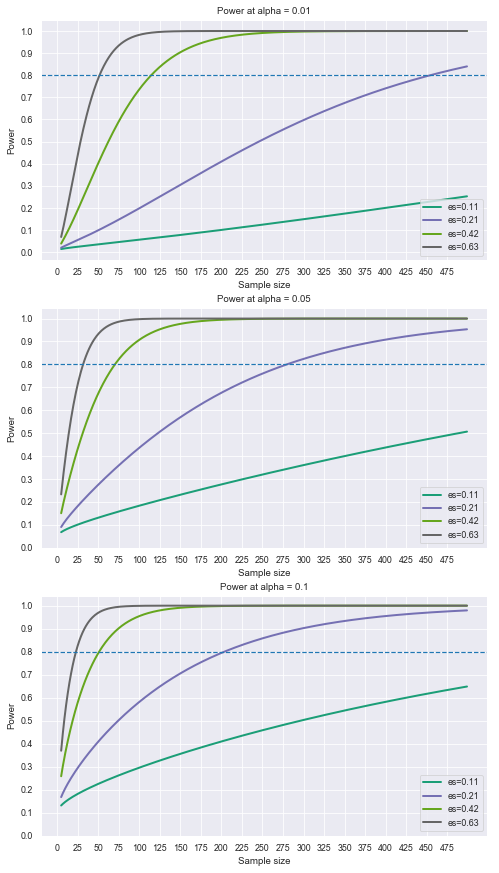

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(8,15))
for index, alpha in enumerate(alphas):
    ax = axes[index]
    power_analysis.plot_power(dep_var='nobs',
                             nobs=np.array(range(5, 500)),
                             effect_size=cohens_ds,
                             alpha=alpha,
                             alternative='larger',
                             ax=ax)
    ax.set_title('Power at alpha = {}'.format(alpha))
    ax.set_xlabel('Sample size')
    ax.set_ylabel('Power')
    ax.set_xticks(list(range(0, 500, 25)))
    ax.set_yticks(np.linspace(0, 1, 11))
    ax.axhline(y=0.8, linestyle='--')


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

Assuming that we have a typical tolerance for mistakes, we could detect an increase in response rate of 1% with a sample of 280 users. With these parameters, our experiment would have a 5% chance of mistakenly observing an improvement where there isn't any, and a 20% chance of mistakenly saying there has no improvement when there actually has. To reduce the latter risk to 10%, we would need to add another 100 users to the experiment.

If you're willing to tolerate a 10% risk of false positives, we could run the same experiment with only about 200 users. If you would rather minimize the risk of false positives to 1%, we would need about 450 users.

That's all for a minimum 1% improvement with the new template. If you're willing to raise the minimum, we could get away with fewer users in the experiment. For instance, to detect a minimum 3% improvement with default tolerances for error, we would only need about 30 participants.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.